### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd
data_olah = pd.read_csv('online_retail_II.csv')
data_olah

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
188656,507292,21069,VINTAGE BILLBOARD TEA MUG,1,2010-05-07 14:28:00,2.51,NaN,United Kingdom
188657,507292,21080,SET/20 RED SPOTTY PAPER NAPKINS,1,2010-05-07 14:28:00,1.66,NaN,United Kingdom
188658,507292,21086,SET/6 RED SPOTTY PAPER CUPS,2,2010-05-07 14:28:00,1.66,NaN,United Kingdom
188659,507292,21094,SET/6 RED SPOTTY PAPER PLATES,2,2010-05-07 14:28:00,1.66,NaN,United Kingdom


In [ ]:
#tipe data
data_olah.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

## Section 1

### Create New Feature: Year

In [ ]:
#mengubah kolom InvoiceData menjadi tipe datatime
data_olah['InvoiceDate'] = pd.to_datetime(data_olah.InvoiceDate)
data_olah

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
188656,507292,21069,VINTAGE BILLBOARD TEA MUG,1,2010-05-07 14:28:00,2.51,NaN,United Kingdom
188657,507292,21080,SET/20 RED SPOTTY PAPER NAPKINS,1,2010-05-07 14:28:00,1.66,NaN,United Kingdom
188658,507292,21086,SET/6 RED SPOTTY PAPER CUPS,2,2010-05-07 14:28:00,1.66,NaN,United Kingdom
188659,507292,21094,SET/6 RED SPOTTY PAPER PLATES,2,2010-05-07 14:28:00,1.66,NaN,United Kingdom


In [ ]:
#cek tipe data
data_olah.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
#mengambil tahun
from pandas.core.indexes.period import DatetimeIndex
year = DatetimeIndex(data_olah['InvoiceDate']).year
year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='InvoiceDate', length=188661)

In [ ]:
#mmebuat kolom
data_olah['Year'] = year
data_olah.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0


### Filtering Data

In [ ]:
#buat variabel sales
#Quantity minimal 1
sales_1 = data_olah[data_olah['Quantity'] >= 1]
sales_1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0
...,...,...,...,...,...,...,...,...,...
165062,505002,M,Manual,2.0,2010-04-19 12:39:00,1.25,16905.0,United Kingdom,2010.0
165063,505002,17039,INLAID WOOD INCENSE HOLDER,10.0,2010-04-19 12:39:00,0.29,16905.0,United Kingdom,2010.0
165064,505002,79323P,PINK CHERRY LIGHTS,3.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0
165065,505002,79323W,WHITE CHERRY LIGHTS,5.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0


In [ ]:
from pandas.core import flags
#buat variabel baru
import re
sales_2 = sales_1[sales_1['Invoice'].str.contains('C') == False]
sales_2.info()
sales_2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160793 entries, 0 to 165066
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      160793 non-null  object        
 1   StockCode    160793 non-null  object        
 2   Description  160349 non-null  object        
 3   Quantity     160793 non-null  float64       
 4   InvoiceDate  160793 non-null  datetime64[ns]
 5   Price        160793 non-null  float64       
 6   Customer ID  121964 non-null  float64       
 7   Country      160793 non-null  object        
 8   Year         160793 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 12.3+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0
...,...,...,...,...,...,...,...,...,...
165062,505002,M,Manual,2.0,2010-04-19 12:39:00,1.25,16905.0,United Kingdom,2010.0
165063,505002,17039,INLAID WOOD INCENSE HOLDER,10.0,2010-04-19 12:39:00,0.29,16905.0,United Kingdom,2010.0
165064,505002,79323P,PINK CHERRY LIGHTS,3.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0
165065,505002,79323W,WHITE CHERRY LIGHTS,5.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0


### Create New Feature: Revenue

In [ ]:
# membuat kolom baru Renenue = Quantity * Price
data_olah['Quantity'] = data_olah['Quantity'].astype('float')
data_olah['Quantity']
revenue = [data_olah['Quantity'] * data_olah['Price']]
revenue

[0          83.40
 1          81.00
 2          81.00
 3         100.80
 4          30.00
            ...  
 165063      2.90
 165064     20.25
 165065     33.75
 165066      6.75
 165067       NaN
 Length: 165068, dtype: float64]

In [ ]:
# membuat kolom baru Renenue = Quantity * Price
revenue = pd.DataFrame(revenue)
revenue = revenue.transpose()
print(revenue)

             0
0        83.40
1        81.00
2        81.00
3       100.80
4        30.00
...        ...
165063    2.90
165064   20.25
165065   33.75
165066    6.75
165067     NaN

[165068 rows x 1 columns]


In [ ]:
#kolom baru
data_olah['Revenue'] = revenue
data_olah.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0,30.0


### Average of Revenue per Year

In [ ]:
Average_revenue = data_olah[['Year','Revenue']]
Average_revenue = Average_revenue.groupby('Year').mean()
Average_revenue

,Revenue
Year,
2009.0,17.684777
2010.0,18.841880


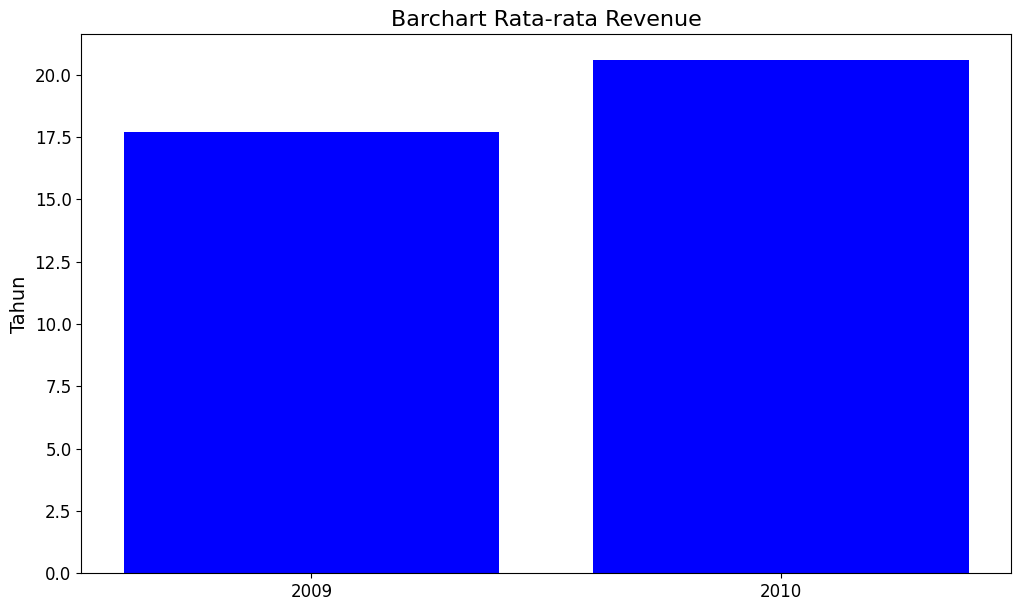

In [ ]:
#Visualisasi dengan Barchart
import matplotlib.pyplot as plt
%matplotlib inline

Avg_revenue = [17.68477, 20.593122]
Year = ['2009', '2010']

plt.figure(figsize=(12,7))
plt.bar(Year, Avg_revenue, color='blue')

plt.title('Barchart Rata-rata Revenue', size=16)
plt.ylabel('Tahun', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

### Interpretation

Berdasarkan Barchart di atas diketahui bahwa rata-rata revenue pada tahun 2010 lebih besar dibandingkan tahun sebelumnya (2009), sehingga terjadi peningkatan rata-rata revenue.

## Section 2

### Filtering Data

#### Customers who finished their purchases

In [ ]:
#buat variabel finished
finished = sales_2[sales_2['Customer ID'].notna()]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0
...,...,...,...,...,...,...,...,...,...
165062,505002,M,Manual,2.0,2010-04-19 12:39:00,1.25,16905.0,United Kingdom,2010.0
165063,505002,17039,INLAID WOOD INCENSE HOLDER,10.0,2010-04-19 12:39:00,0.29,16905.0,United Kingdom,2010.0
165064,505002,79323P,PINK CHERRY LIGHTS,3.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0
165065,505002,79323W,WHITE CHERRY LIGHTS,5.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0


#### Customers who canceled their purchases

In [ ]:
#variabel baru: cancel
cancel = data_olah[data_olah['Invoice'].str.contains('C') == False]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009.0,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009.0,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009.0,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009.0,30.00
...,...,...,...,...,...,...,...,...,...,...
165063,505002,17039,INLAID WOOD INCENSE HOLDER,10.0,2010-04-19 12:39:00,0.29,16905.0,United Kingdom,2010.0,2.90
165064,505002,79323P,PINK CHERRY LIGHTS,3.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0,20.25
165065,505002,79323W,WHITE CHERRY LIGHTS,5.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0,33.75
165066,505002,79323S,SILVER CHERRY LIGHTS,1.0,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,2010.0,6.75


### Number of Finished and Canceled Transactions Each Year

In [ ]:
#menghitung jumlah transaksi yang berhasil setiap tahun
count_finished = finished[['Year', 'Customer ID']].groupby('Year').count()
count_finished


,Customer ID
Year,
2009.0,30761
2010.0,91203


In [ ]:
#menghitung jumlah transaksi yang dibatalkan setiap tahun
count_cancel = cancel[['Year', 'Invoice']].groupby('Year').count()
count_cancel

,Invoice
Year,
2009.0,44213
2010.0,117471


### Cancellation Rate

In [ ]:
from numpy.ma.core import count
#cancellation rate = (jumlah cust cancel / jumlah cust keseluruhan)*100%
jumlah_batal = count_cancel
jumlah_batal


,Invoice
Year,
2009.0,44213
2010.0,117471


In [ ]:
from numpy.ma.core import count
#cancellation rate = (jumlah cust cancel / jumlah cust keseluruhan)*100%
total = data_olah['Customer ID'].count()
cancellation_rate = (jumlah_batal / total) * 100
cancellation_rate #persen

,Invoice
Year,
2009.0,5.363286
2010.0,14.249894


### Interpretation

Berdasarkan no (3) diketahui bahwa jumlah customer yang transaksinya berhasil pada tahun 2010 lebih banyak dibandingkan tahun sebelumnya (2009). Begitu pula dengan jumlah transaksi yang dibatalkan oleh customer pada tahun 2010 lebih banyak dibandingkan 2009, sehingga rate (no 4) untuk transaksi yang dibatalkan oleh customer pada tahun 2010 lebih besar dibandingkan tahun 2009, sehingga mengalami peningkatan cancellation rate antara tahun 2009 dan 2010.